# Gender Development and Inequality by Country

Gender inequality and development as measurements of quality of life for women compared to men have increased in study as well as importance.  Globally speaking, cultivation and development for women wasn't prioritized as it was for men.  Recently, within the last 3 decades, the glaring disparity of gender inequality and development between women and men is being addressed and monitored.  This is progress toward equalizing gender development and equality between women and men, and it's something that can be fixed over time with willingness and dedication.  

**This dataset answers some basic questions including how do GDI and GII relate to each other? What are the countries with the best and worst GDI?  What are the countries with the highest and lowest GII?**

## Data Summary: 

The International Monetary Fund's (IMF) research on gender and economics **dataset includes gender inequality and development indices for 155 countries from 1990 through 2013.**  This dataset was downloaded from https://data.world.

Source: http://data.imf.org/?sk=388DFA60-1D26-4ADE-B505-A05A558D9A42&sId=1479329132331

## Key Terms:

**Gender Development Index ([GD Index](http://hdr.undp.org/en/content/what-does-gender-development-index-gdi-measure))** - The GDI measures differences between male and female achievements in three basic dimensions of human development: health, measured by female and male life expectancy at birth; education, measured by female and male expected years of schooling for children and female and male mean years of schooling for adults ages 25 and older; and equitable command over economic resources, measured by female and male estimated earned income. 

**Gender Equity Index ([GE Index](https://en.wikipedia.org/wiki/Measures_of_gender_equality))** - The GEI was developed to measure situations that are unfavourable to women. It is designed to facilitate international comparisons by ranking countries based on three dimensions of gender inequity indicators: education, economic participation and empowerment. Due to its focus on socioeconomic opportunities, it has been criticized for ignoring underlying causes of gender inequality such as health. 



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Gender Equality.csv')

In [4]:
df.columns.values[0] = 'Country_Name'

In [5]:
# rename columns so easier to code

df = df.rename(columns = {'Country Code': 'Country_Code', 'Indicator Name': 'Indicator_Name'
                     , 'Indicator Code': 'Indicator_Code', 'Attribute':'Attribute'})

In [6]:
df = (df.set_index(['Country_Name', 'Country_Code', 'Indicator_Name', 'Indicator_Code', 'Attribute'])
   .rename_axis(['Year'], axis=1)
   .stack()
   .reset_index())

In [7]:
# rename new value column from 0 to Index_Value

df = df.rename(columns = {0:'Index_Value'})

In [8]:
# separate GDI & GII into 2 separate DF

df_GDI = df.loc[(df.Indicator_Name == 'Gender Development Index')]
df_GII = df.loc[(df.Indicator_Name == 'Gender Inequality Index')]

## How do GDI and GII relate to each other?

As the gender development index increases, the gender inequality index decreases.  This trend is reflected graphically by showing increases in the gender development of women leads to decreases in gender inequality.

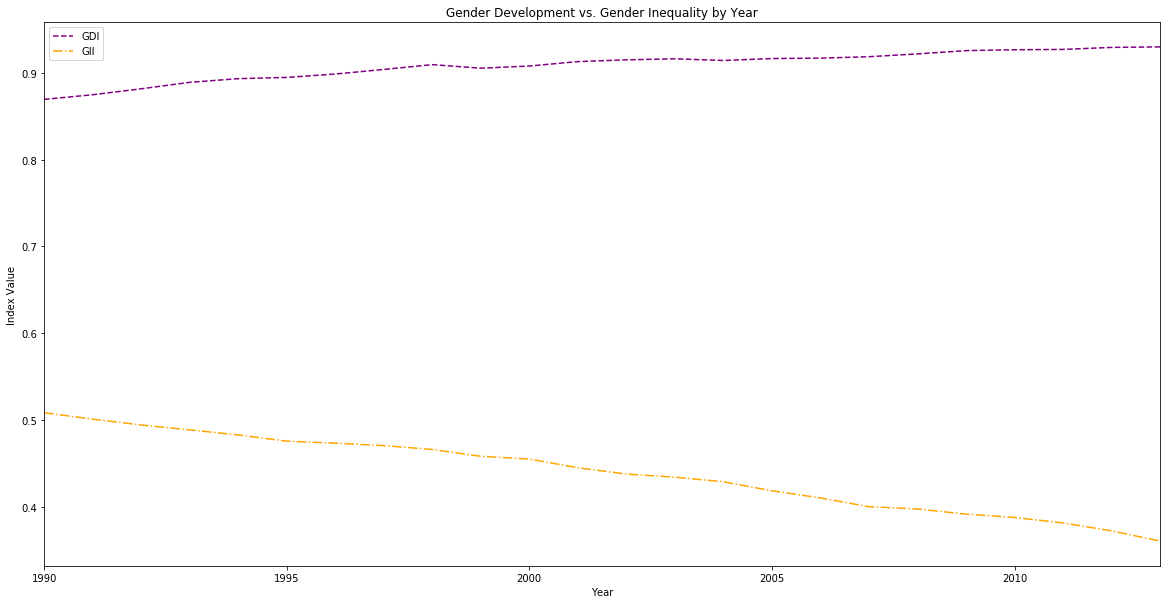

In [9]:
#plot gdi/gii by year

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.title('Gender Development vs. Gender Inequality by Year');
df_GDI.groupby('Year').Index_Value.mean().plot(kind = 'line', linestyle = '--', color = 'purple', label='GDI')
df_GII.groupby('Year').Index_Value.mean().plot(kind = 'line', linestyle = '-.', color = 'orange', label='GII')
plt.legend()
plt.show();

## What are the 25 countries with the worst GDI?

From lowest to highest, the countries with the worst gender development index are:

Islamic Republic of Afghanistan, Niger, Pakistan, Republic of Yemen, Mali, Iraq, Mauritania, Chad, Central African Republic, Benin, Cote d'Ivoire, India, Togo, Liberia, Sierra Leone, Morocco, Guinea, Nepal, Sudan, Syrian Arab Republic, Democratic Republic of Congo, Ethiopia, Senegal, Jordan, and Egypt

In [10]:
low_gdi = df_GDI.groupby('Country_Name').Index_Value.mean().sort_values()
low_gdi[:25]

Country_Name
Afghanistan, Islamic Republic of    0.509543
Niger                               0.628254
Pakistan                            0.629932
Yemen, Republic of                  0.680577
Mali                                0.728026
Iraq                                0.738789
Mauritania                          0.739035
Chad                                0.741090
Central African Republic            0.748368
Benin                               0.752207
Cote d'Ivoire                       0.759385
India                               0.761947
Togo                                0.767046
Liberia                             0.771973
Sierra Leone                        0.774481
Morocco                             0.779669
Guinea                              0.780491
Nepal                               0.794247
Sudan                               0.799913
Syrian Arab Republic                0.800504
Congo, Democratic Republic of       0.800867
Ethiopia                            0.8040

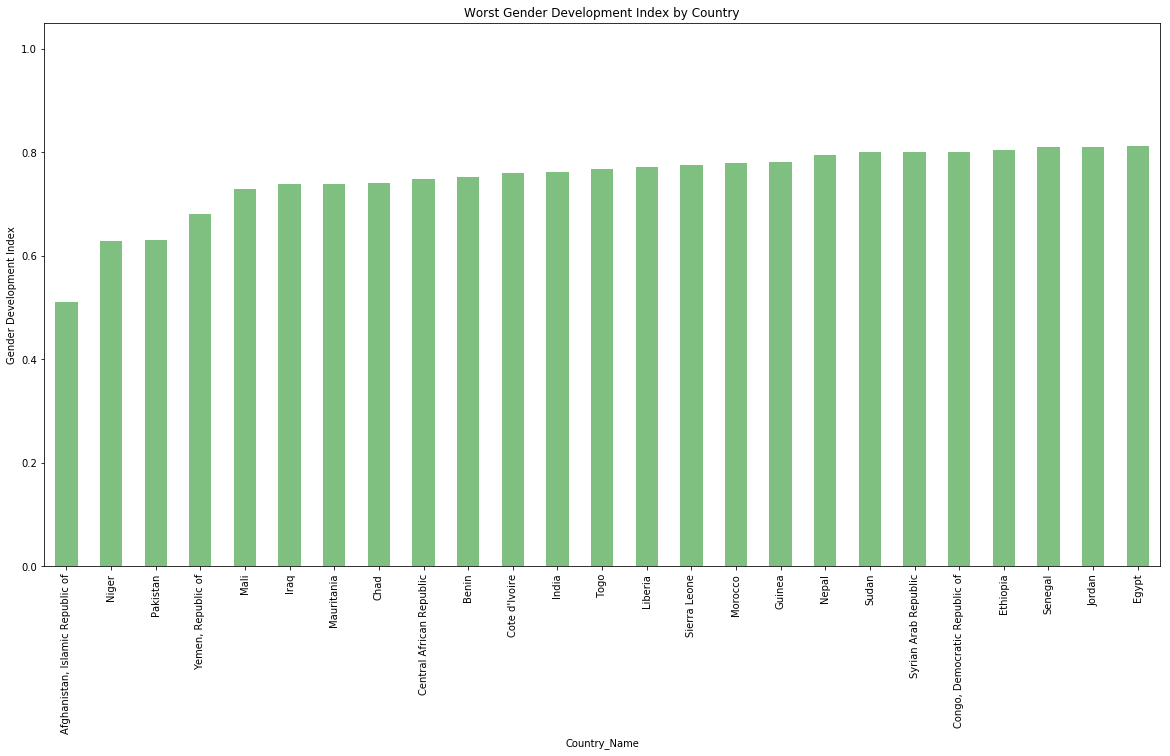

In [11]:
# plot lowest gdi

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.title('Worst Gender Development Index by Country')
plt.xlabel('Country')
plt.ylabel('Gender Development Index')
low_gdi[:25].plot(kind='bar', color ='green', alpha=0.5)
plt.ylim(ymax=1.05)
plt.ylim(ymin=0)

plt.show();

## How does the median GDI of the 25 worst countries compare to the median GDI of all countries?

For all boxplots, the interquartile range includes all data within the box, which is comprised of the lower 25th percentile to the upper 75th percentile.  The boxplot is separated as follows:

the lowest value to the 25th percentile,<br>
the 25th percentile to the median (middle value),<br>
the median (middle value) to the 75th percentile,<br> and
the 75th percentile to the maximum value.

In the boxplot for the 25 worst countries, the median value is approximately 0.76, with the outliers being 0.50, 0.62, and 0.68.  The outliers are shown in both boxplots and fall about 3 standard deviations outside of the normal range.

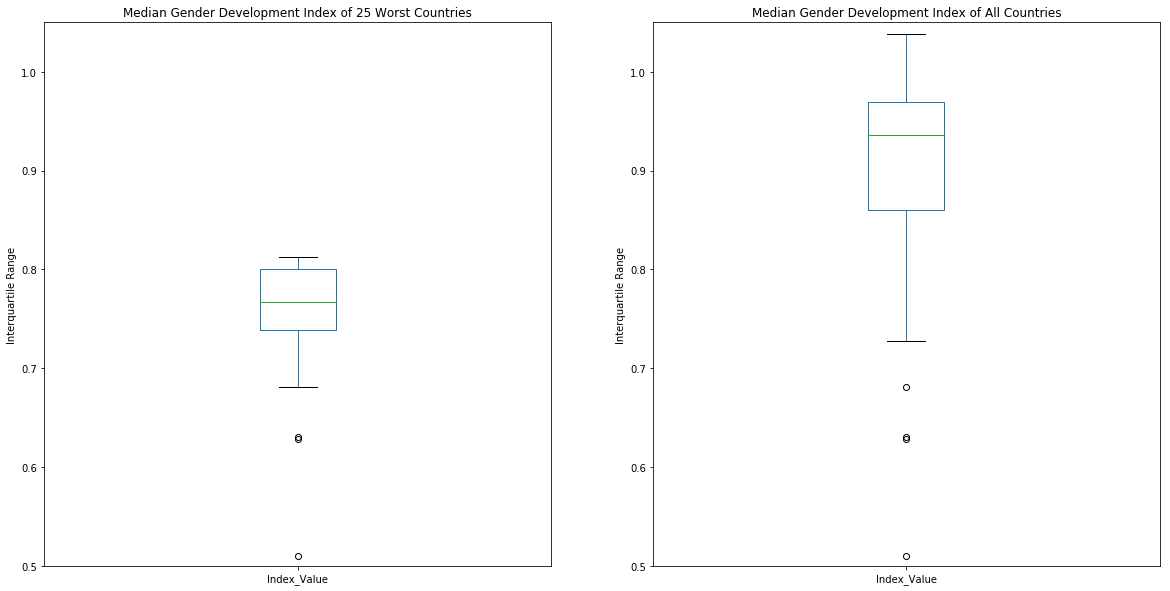

In [12]:
# low_gdi[:25] boxplot subplot

plt.subplot(1, 2, 1)
plt.title('Median Gender Development Index of 25 Worst Countries')
plt.ylabel('Interquartile Range')
low_gdi[:25].plot(kind='box')
plt.ylim(ymax=1.05) # adjust the max leaving min unchanged 
plt.ylim(ymin=0.5) # adjust the min leaving max unchanged

plt.subplot(1, 2, 2)
plt.title('Median Gender Development Index of All Countries')
plt.ylabel('Interquartile Range')
low_gdi.plot(kind='box')
plt.ylim(ymax=1.05) # adjust the max leaving min unchanged 
plt.ylim(ymin=0.5) # adjust the min leaving max unchanged


plt.show();

**The histogram below shows a more pictorial representation of the outliers.  They stand out in both charts and represent the bars to the far left.** 

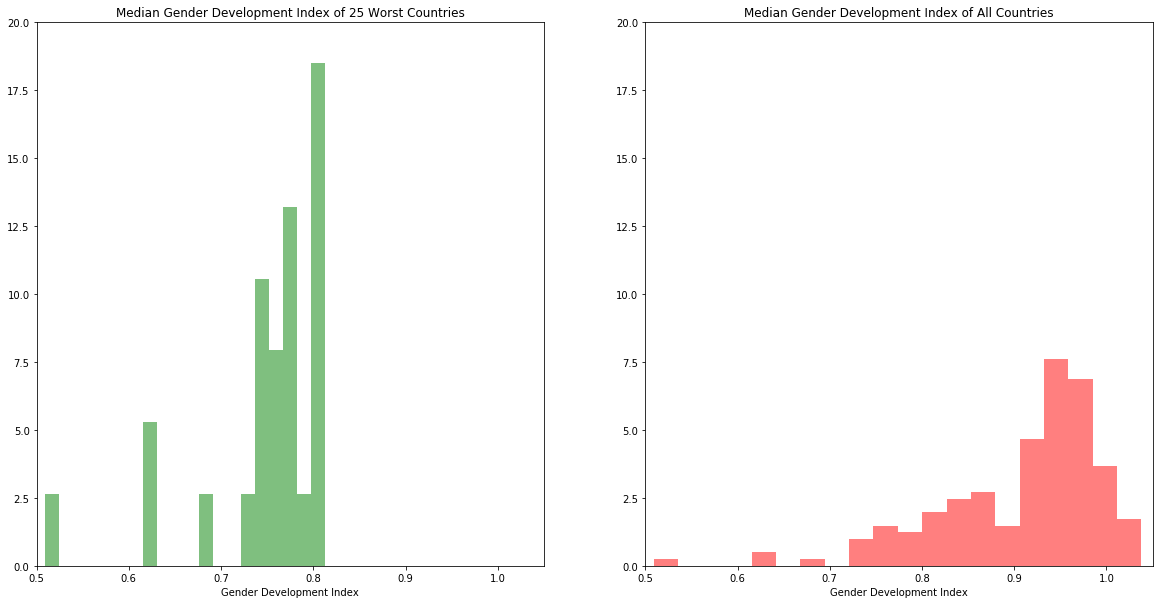

In [13]:
# worst 25 gdi histogram

plt.subplot(1, 2, 1)
plt.hist(x=low_gdi[:25], normed=True, color='green', bins=20, alpha=0.5) 
plt.title('Median Gender Development Index of 25 Worst Countries')
plt.xlabel('Gender Development Index')
plt.ylim(ymax=20) 
plt.ylim(ymin=0)
plt.xlim(xmax=1.05)
plt.xlim(xmin=0.5)

plt.subplot(1, 2, 2)
plt.hist(x=low_gdi, normed=True, color='red', bins=20, alpha=0.5)
plt.title('Median Gender Development Index of All Countries')
plt.xlabel('Gender Development Index')
plt.ylim(ymax=20) 
plt.ylim(ymin=0)
plt.xlim(xmax=1.05)
plt.xlim(xmin=0.5)

plt.show();

## What are the 25 countries with the best GDI?

In increasing order, the countries with the best gender development index are:

Philippines, Lesotho, France, Iceland, Bulgaria, Dominican Republic, United States, Norway, Jamaica, Barbados, Poland, Uruguay, Ukraine, Finland, Slovenia, The Bahamas, Sweden, Kazakhstan, Mongolia, Belarus, Lithuania, Estonia, Latvia, Russian Federation, and Myanmar

In [14]:
high_gdi = df_GDI.groupby('Country_Name').Index_Value.mean().sort_values()
high_gdi[129:]

Country_Name
Philippines           0.981437
Lesotho               0.982715
France                0.984666
Iceland               0.987210
Bulgaria              0.989147
Dominican Republic    0.989204
United States         0.989521
Norway                0.989755
Jamaica               0.990439
Barbados              0.991062
Poland                0.994147
Uruguay               0.994338
Ukraine               0.996908
Finland               1.002181
Slovenia              1.002604
Bahamas, The          1.002705
Sweden                1.003785
Kazakhstan            1.004668
Mongolia              1.015227
Belarus               1.019419
Lithuania             1.021261
Estonia               1.026294
Latvia                1.027203
Russian Federation    1.028536
Myanmar               1.037971
Name: Index_Value, dtype: float64

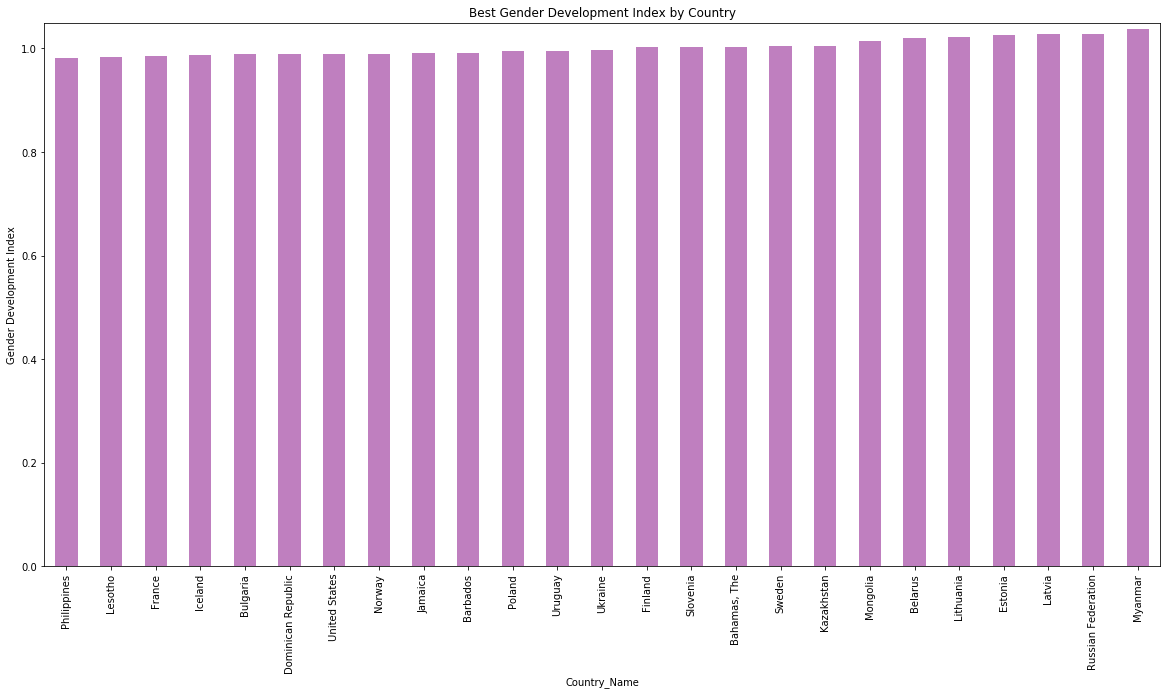

In [15]:
# sort & plot highest gdi

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.title('Best Gender Development Index by Country')
plt.xlabel('Country')
plt.ylabel('Gender Development Index')
high_gdi[129:].plot(kind='bar', color = 'purple', alpha=0.5)
plt.ylim(ymax=1.05)
plt.ylim(ymin=0)

plt.show();

## How does the median GDI of the 25 best countries compare to the median GDI of all countries?

The median GDI of th 25 best countries is approximately 1.00, which falls within the normal range in both boxplots, with no outliers.  As shown in the previous graph, the middle value of the 25 best countries is higher in comparison to the middle value of all countries.

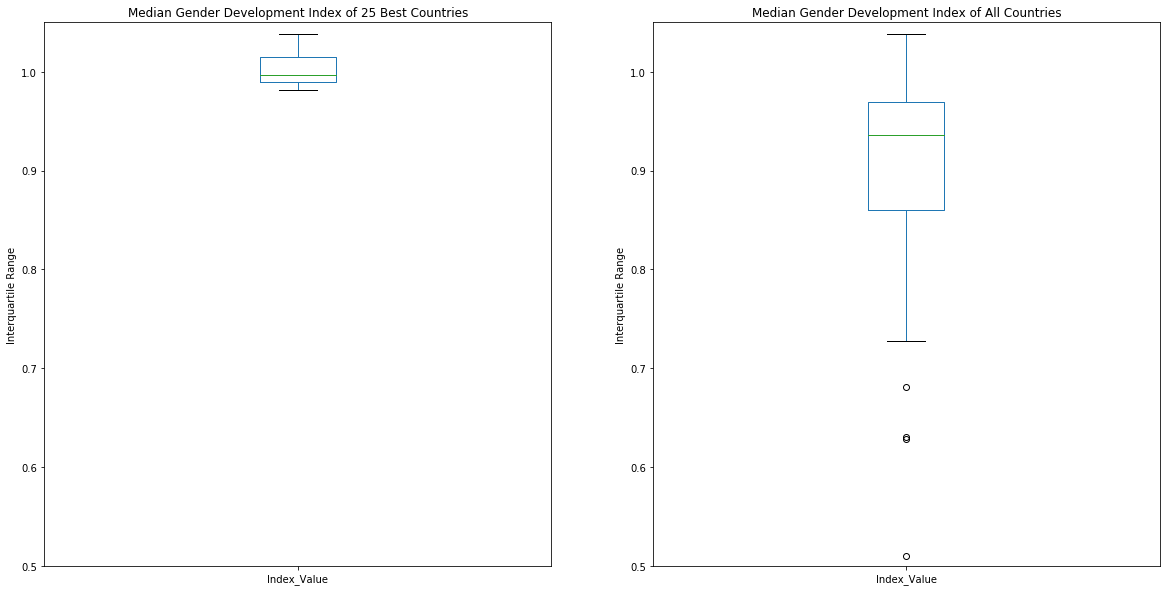

In [16]:
# high_gdi[129:] boxplot subplot

plt.subplot(1, 2, 1)
plt.title('Median Gender Development Index of 25 Best Countries')
plt.ylabel('Interquartile Range')
high_gdi[129:].plot(kind='box')
plt.ylim(ymax=1.05) # adjust the max leaving min unchanged 
plt.ylim(ymin=0.5) # adjust the min leaving max unchanged

plt.subplot(1, 2, 2)
plt.title('Median Gender Development Index of All Countries')
plt.ylabel('Interquartile Range')
high_gdi.plot(kind='box')
plt.ylim(ymax=1.05) # adjust the max leaving min unchanged 
plt.ylim(ymin=0.5) # adjust the min leaving max unchanged

plt.show();

**The histograms below show the gender development index for both the 25 best countries and all countries fall within a normal range with no outliers.**

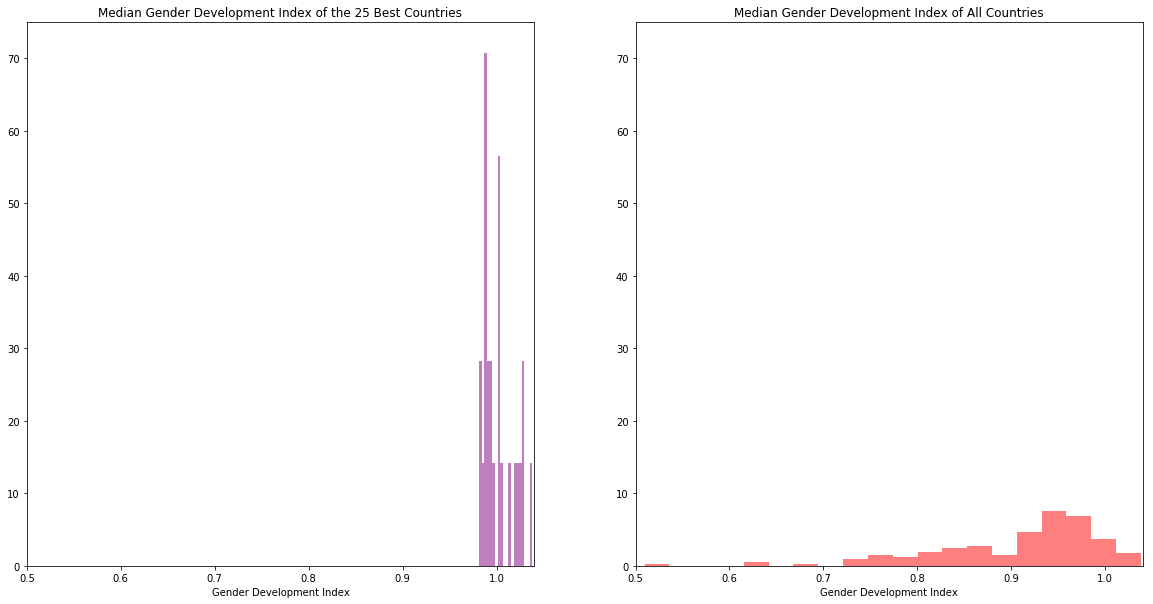

In [17]:
# histogram of gdi for 25 best/all subplot for easier comparison

plt.subplot(1,2,1)
plt.hist(x=high_gdi[129:], normed=True, color='purple', bins=20, alpha=0.5) 
plt.title('Median Gender Development Index of the 25 Best Countries')
plt.xlabel('Gender Development Index')
plt.ylim(ymax=75) 
plt.ylim(ymin=0)
plt.xlim(xmax=1.04)
plt.xlim(xmin=0.5)

plt.subplot(1, 2, 2)
plt.hist(x=high_gdi, normed=True, color='red', bins=20, alpha=0.5)
plt.title('Median Gender Development Index of All Countries')
plt.xlabel('Gender Development Index')
plt.ylim(ymax=75)
plt.ylim(ymin=0)
plt.xlim(xmax=1.04)
plt.xlim(xmin=0.5)

plt.show();

## What are the 25 countries with the lowest GII?

From lowest to highest, the countries with the best gender inequality index are:

Sweden, Denmark, Netherlands, Switzerland, Finland, Norway, Germany, Slovenia, Iceland, Spain, Belgium, Czech Republic, Austria, Italy, Canada, France, Luxembourg, Austraia, Singapore, Libya, Croatia, Republic of Serbia, Japan Israel, and Portugal

In [18]:
low_gii = df_GII.groupby('Country_Name').Index_Value.mean().sort_values()
low_gii[:25]

Country_Name
Sweden                 0.062696
Denmark                0.077221
Netherlands            0.084808
Switzerland            0.086344
Finland                0.089676
Norway                 0.094467
Germany                0.099839
Slovenia               0.110721
Iceland                0.130623
Spain                  0.132942
Belgium                0.133888
Czech Republic         0.142022
Austria                0.144851
Italy                  0.156622
Canada                 0.163725
France                 0.165700
Luxembourg             0.169658
Australia              0.170179
Singapore              0.179019
Libya                  0.182799
Croatia                0.186048
Serbia, Republic of    0.187310
Japan                  0.188105
Israel                 0.190165
Portugal               0.191973
Name: Index_Value, dtype: float64

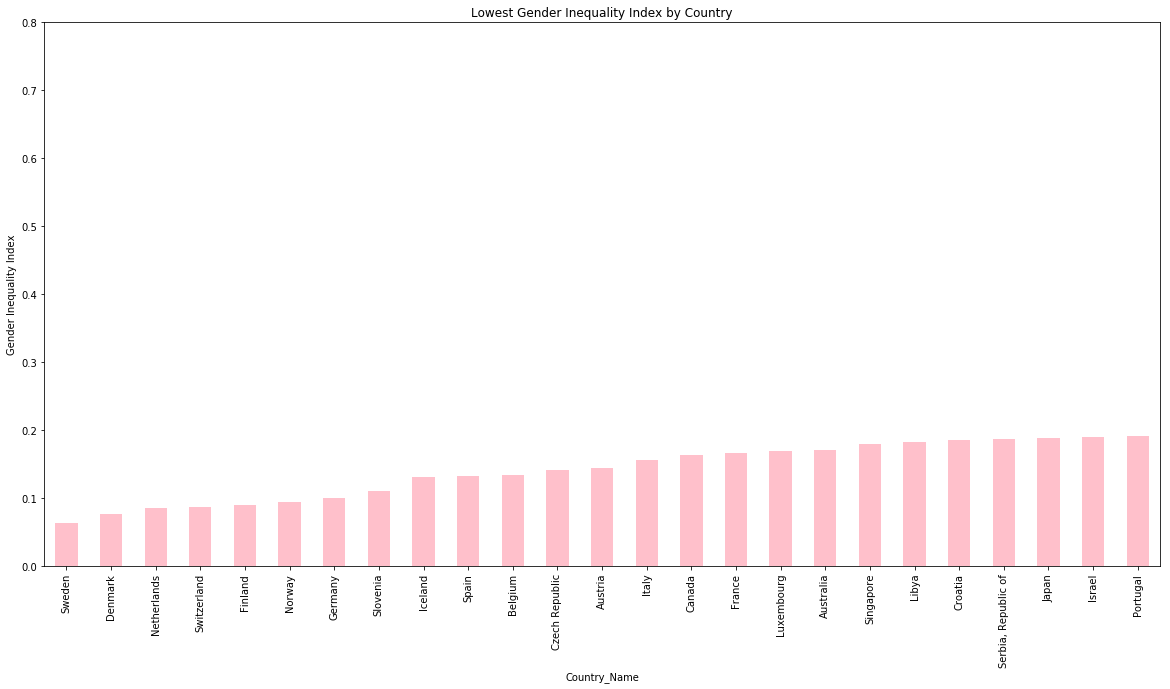

In [19]:
# sort & plot lowest gii

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.title('Lowest Gender Inequality Index by Country')
plt.xlabel('Country')
plt.ylabel('Gender Inequality Index')
low_gii[:25].plot(kind='bar', color = 'pink')
plt.ylim(ymax=0.8)
plt.ylim(ymin=0)

plt.show();

## How does the median GII of the 25 lowest countries compare to the median GII of all countries?

The median gender inequality index of the 25 lowest countries is approximately 0.15, which is significantly lower than the median GII of all countries.  However, the values are relative enough to each other to fall within a normal range with no outlier values.

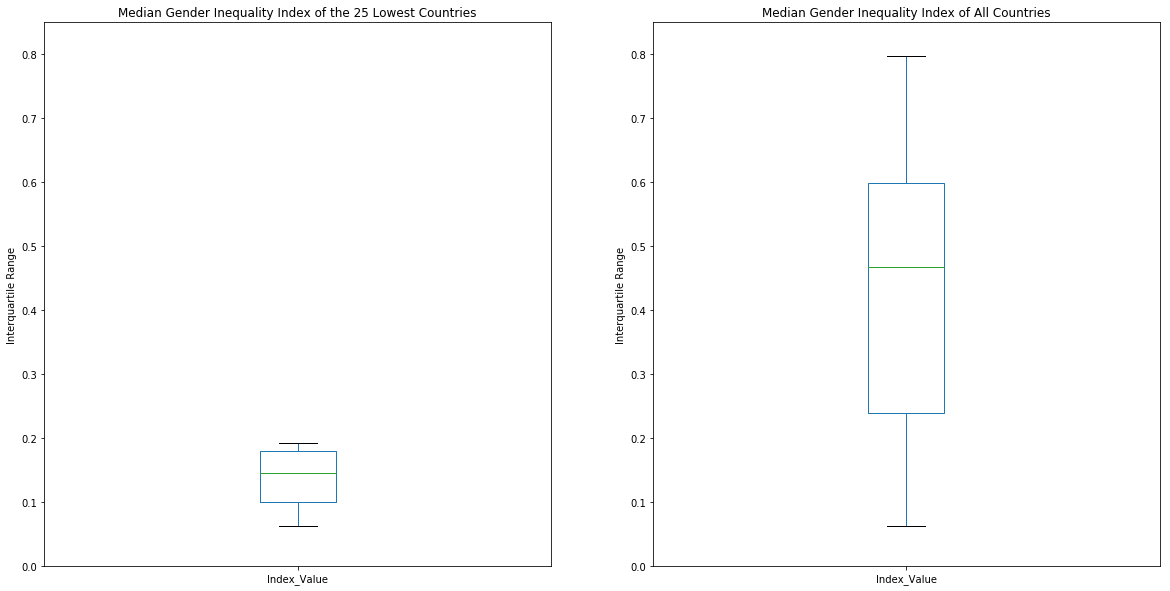

In [20]:
# low_gii[:25] boxplot

plt.subplot(1, 2, 1)
plt.title('Median Gender Inequality Index of the 25 Lowest Countries')
plt.ylabel('Interquartile Range')
low_gii[:25].plot(kind='box')
plt.ylim(ymax=0.85) # adjust the max leaving min unchanged 
plt.ylim(ymin=0) # adjust the min leaving max unchanged

plt.subplot(1, 2, 2)
plt.title('Median Gender Inequality Index of All Countries')
plt.ylabel('Interquartile Range')
low_gii.plot(kind='box')
plt.ylim(ymax=0.85) # adjust the max leaving min unchanged 
plt.ylim(ymin=0) # adjust the min leaving max unchanged

plt.show();

**All of the values for the 25 countries with the lowest gender inequality index fall within a normal range relative to each other, with no outlier values.** 

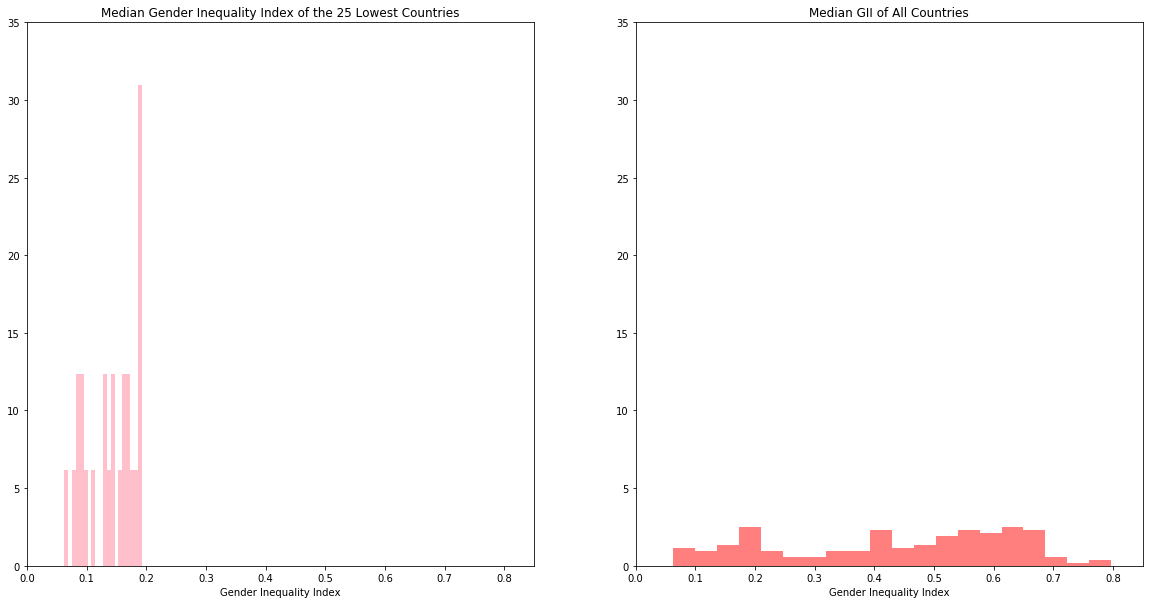

In [21]:
# histogram of gii for 25 best/all hist subplot

plt.subplot(1, 2, 1)
plt.hist(x=low_gii[:25], normed=True, color='pink', bins=20) 
plt.title('Median Gender Inequality Index of the 25 Lowest Countries')
plt.xlabel('Gender Inequality Index')
plt.ylim(ymax=35) 
plt.ylim(ymin=0)
plt.xlim(xmax=0.85)
plt.xlim(xmin=0)

plt.subplot(1, 2, 2)
plt.hist(x=low_gii, normed=True, color='red', bins=20, alpha=0.5)
plt.title('Median GII of All Countries')
plt.xlabel('Gender Inequality Index')
plt.ylim(ymax=35) 
plt.ylim(ymin=0)
plt.xlim(xmax=0.85)
plt.xlim(xmin=0)

plt.show();

## What are the 25 countries with the highest GII?

From lowest to highest, these are the countries with the highest gender inequality index:

Nepal, Mozambique, Swaziland, Morocco, India, Pakistan, Sudan, Jordan, Sierra Leone, Benin, Cameroon, Kenya, Malawi, Togo, Gambia, Liberia, Papua New Guinea, Mauritania, Democratic Republic of Congo, Mali, Cote d'Ivoire, Central African Republic, Islamic Republic of Afghanistan, Niger, and Republic of Yemen

In [22]:
high_gii = df_GII.groupby('Country_Name').Index_Value.mean().sort_values()
high_gii[116:]

Country_Name
Nepal                               0.630360
Mozambique                          0.631614
Swaziland                           0.634503
Morocco                             0.637440
India                               0.643799
Pakistan                            0.644968
Sudan                               0.649118
Jordan                              0.652931
Sierra Leone                        0.660427
Benin                               0.660623
Cameroon                            0.662065
Kenya                               0.663224
Malawi                              0.665864
Togo                                0.666599
Gambia, The                         0.670300
Liberia                             0.675317
Papua New Guinea                    0.683358
Mauritania                          0.684811
Congo, Democratic Republic of       0.686241
Mali                                0.692437
Cote d'Ivoire                       0.695016
Central African Republic            0.7046

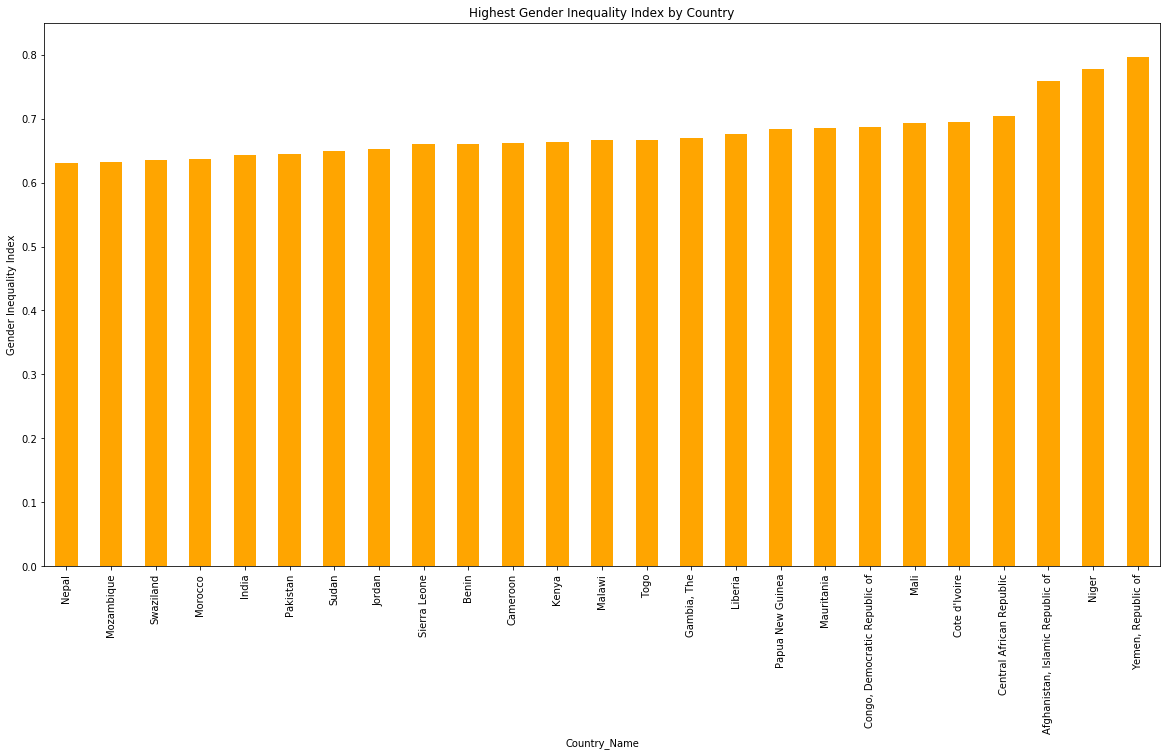

In [23]:
# sort and plot highest gii

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.title('Highest Gender Inequality Index by Country')
plt.xlabel('Country')
plt.ylabel('Gender Inequality Index')
high_gii[116:].plot(kind='bar', color = 'orange')
plt.ylim(ymax=0.85)
plt.ylim(ymin=0)

plt.show();

## How does the median GII of the 25 highest countries compare to the mean GII of all countries?

The median value of the 25 countries with the highest gender inequality index is approximately 0.66, with the outliers being 0.75, 0.77 and 0.79. In comparison to the the remaining 22 countries, these 3 have a gender inequality index high enough to be seen as abnormal.

However, when compared to all countries, all values fall within a normal range with no outliers.

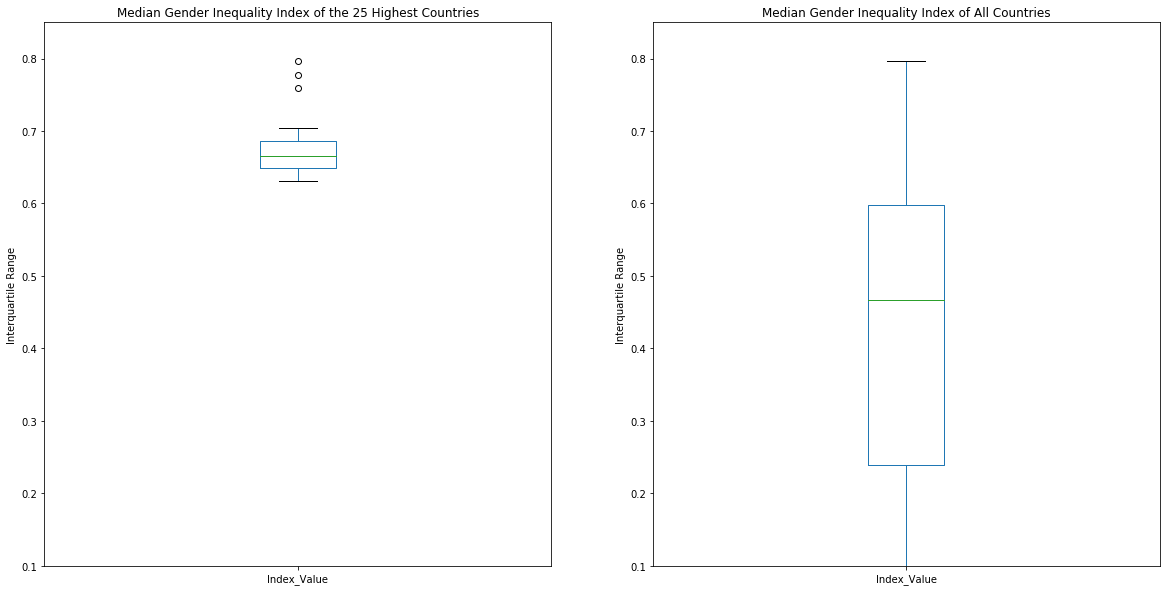

In [24]:
# high_gii[116:]/all boxplot subplot

plt.subplot(1, 2, 1)
plt.title('Median Gender Inequality Index of the 25 Highest Countries')
plt.ylabel('Interquartile Range')
high_gii[116:].plot(kind='box')
plt.ylim(ymax=0.85) 
plt.ylim(ymin=0.1)

plt.subplot(1, 2, 2)
plt.title('Median Gender Inequality Index of All Countries')
plt.ylabel('Interquartile Range')
high_gii.plot(kind='box')
plt.ylim(ymax=0.85) 
plt.ylim(ymin=0.1)

plt.show();

**In the histogram representing the 25 countries with the highest gender inequality index, 3 countries (Afghanistan, NIger and Yemen) fall outside the normal range.  However, when compared all countries, the values of those same countries fall within a normal range, without any outliers.**

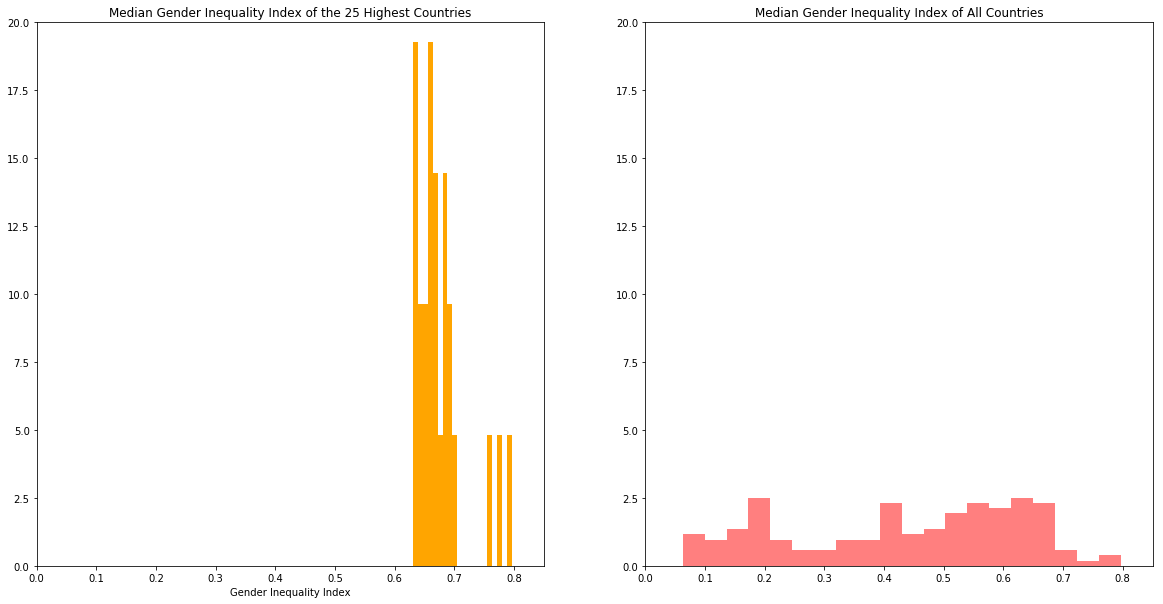

In [25]:
# histogram of gii for 25 worst for easier comparison

plt.subplot(1, 2, 1)
plt.hist(x=high_gii[116:], normed=True, color='orange', bins=20) 
plt.title('Median Gender Inequality Index of the 25 Highest Countries')
plt.xlabel('Gender Inequality Index')
plt.ylim(ymax=20) 
plt.ylim(ymin=0)
plt.xlim(xmax=0.85)
plt.xlim(xmin=0)

plt.subplot(1, 2, 2)
plt.hist(x=high_gii, normed=True, color='red', bins=20, alpha=0.5)
plt.title('Median Gender Inequality Index of All Countries')
plt.ylim(ymax=20) 
plt.ylim(ymin=0)
plt.xlim(xmax=0.85)
plt.xlim(xmin=0)

plt.show();

## How has the GDI for the United States changed?

The gender development index for the United States shows a mostly upward trend.  There was a noticeable jump from 1997 to 1998, and a more substantial drop from 1999 to 2000, which was the worst year during the period.  The GDI appeared to normalize in 2012 and 2013, the last year for which data was available.

In [26]:
# create GDI US DF

df_GDI_US = df_GDI.loc[(df_GDI.Country_Name == 'United States')]

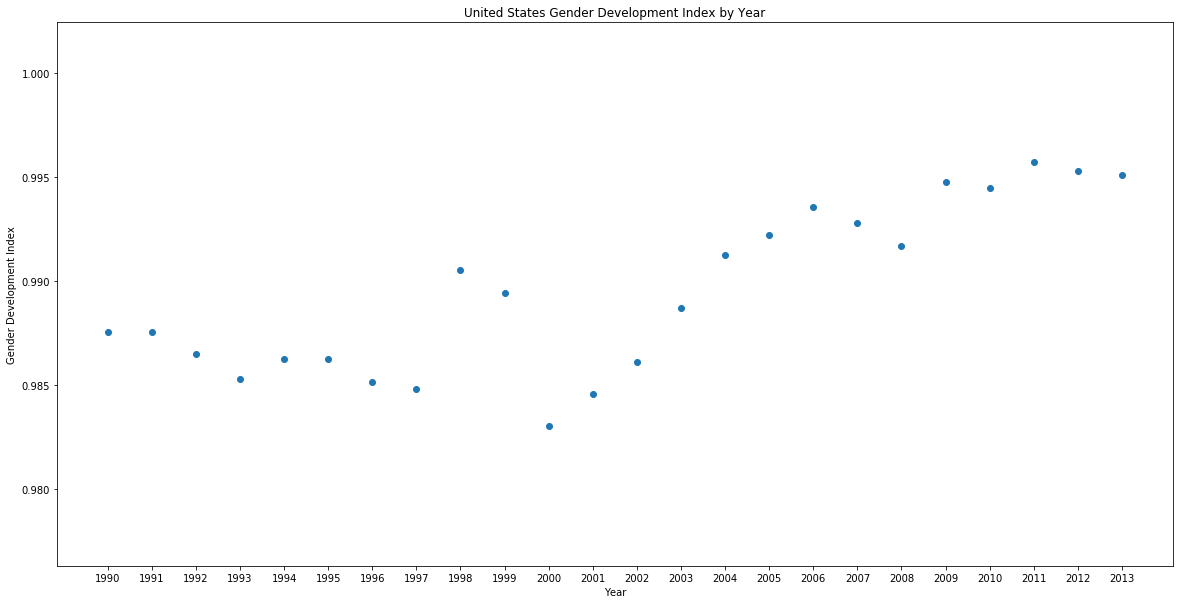

In [27]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.title('United States Gender Development Index by Year')
plt.xlabel('Year')
plt.ylabel('Gender Development Index')
plt.scatter(x=df_GDI_US['Year'], y=df_GDI_US['Index_Value'], label='GDI')

plt.show();

## How has the GII for the United States changed?

The gender inequlaity index declined consistently from 1990 through 1997, when it leveled off through 1998.  After 1998, the downward trend resumed with the lowest GII occurring in 2000 and 2001.  The trend reversed and began trending upward in 2001 with the worst year for gender inequlaity being 2010.  This coincides with the Great Recession of 2007-2012 which hit women very hard.  The downward trend resumed in 2010 and appeared to be leveling out in 2013, teh last year for which data was available.

In [28]:
# create GII US DF

df_GII_US = df_GII.loc[(df_GII.Country_Name == 'United States')]

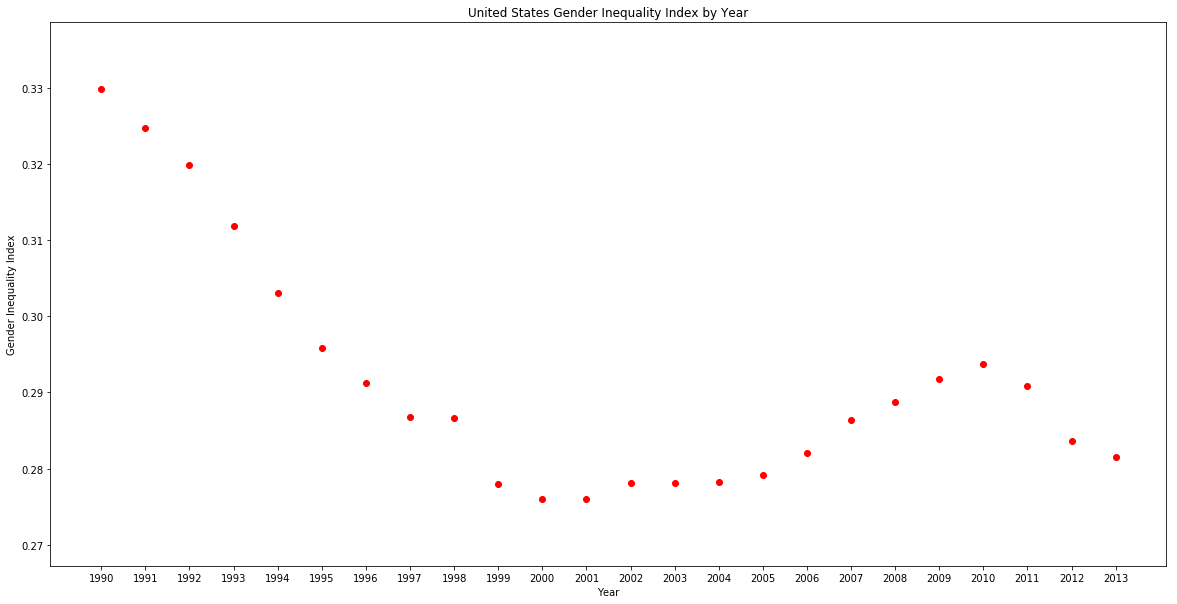

In [29]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.title('United States Gender Inequality Index by Year')
plt.xlabel('Year')
plt.ylabel('Gender Inequality Index')
plt.scatter(x=df_GII_US['Year'], y=df_GII_US['Index_Value'], color='red')

plt.show();

## Summary:

Globally speaking, the countries with the best GDI and GII are a combination of the wealthiest, most educated, and technologically advanced, among other attributes.  GDI and GII are good baseline measurements for determining gender equity, however, wealth, education, and events local to a region/country can positively or negatively affect GDI/GII or both.  More accurate data representation could be had by comparing countries with similar wealth, education, and technological capabilities.